# 마이크로소프트 주식

In [1]:
pip install yfinance matplotlib

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ------------------------------- -------- 2.4/3.0 MB 11.2 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 11.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   --------------------- ------------------ 2.1/3.8 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 10.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138939 sha256=231b8a1a4e231ae65cdbd203e538b7db0339d680d9ca494dcb2a3824d9e2dd2c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheel

[*********************100%***********************]  1 of 1 completed


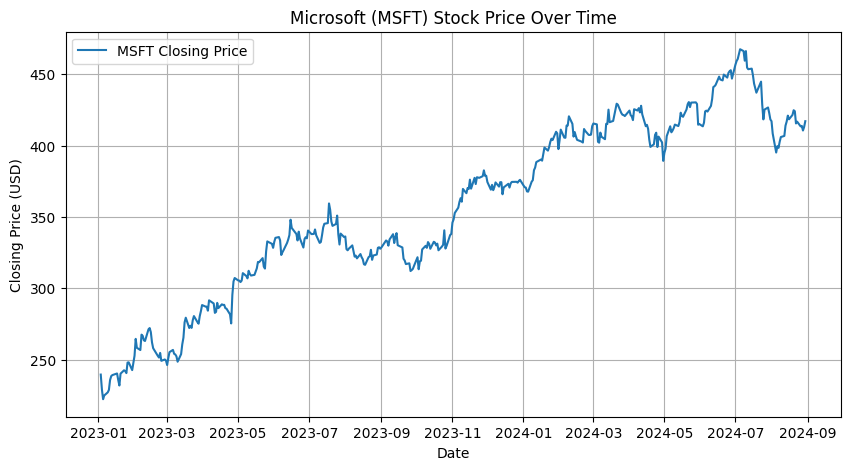

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Microsoft (MSFT) stock data
msft = yf.download('MSFT', start='2023-01-01', end='2024-09-01')

# Plot the closing prices
plt.figure(figsize=(10,5))
plt.plot(msft.index, msft['Close'], label='MSFT Closing Price')
plt.title('Microsoft (MSFT) Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## LSTM

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [4]:
# 1. 주식 데이터 다운로드
msft = yf.download('MSFT', start='2020-01-01', end='2024-09-01')
data = msft['Close'].values.reshape(-1, 1)

# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 학습 데이터와 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 3. 데이터셋 만들기 (LSTM은 시계열 데이터를 입력으로 받음)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

[*********************100%***********************]  1 of 1 completed


In [5]:
# LSTM 입력 형식 맞추기 (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 4. LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

c:\vscode_workspace\industrial_ai\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# 5. 모델 컴파일 및 학습
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0444
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0055
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0019
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.5546e-04
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.8337e-04
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.5109e-04
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.7478e-04
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.0538e-04
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.5031e-04


In [7]:
# 6. 예측 수행
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


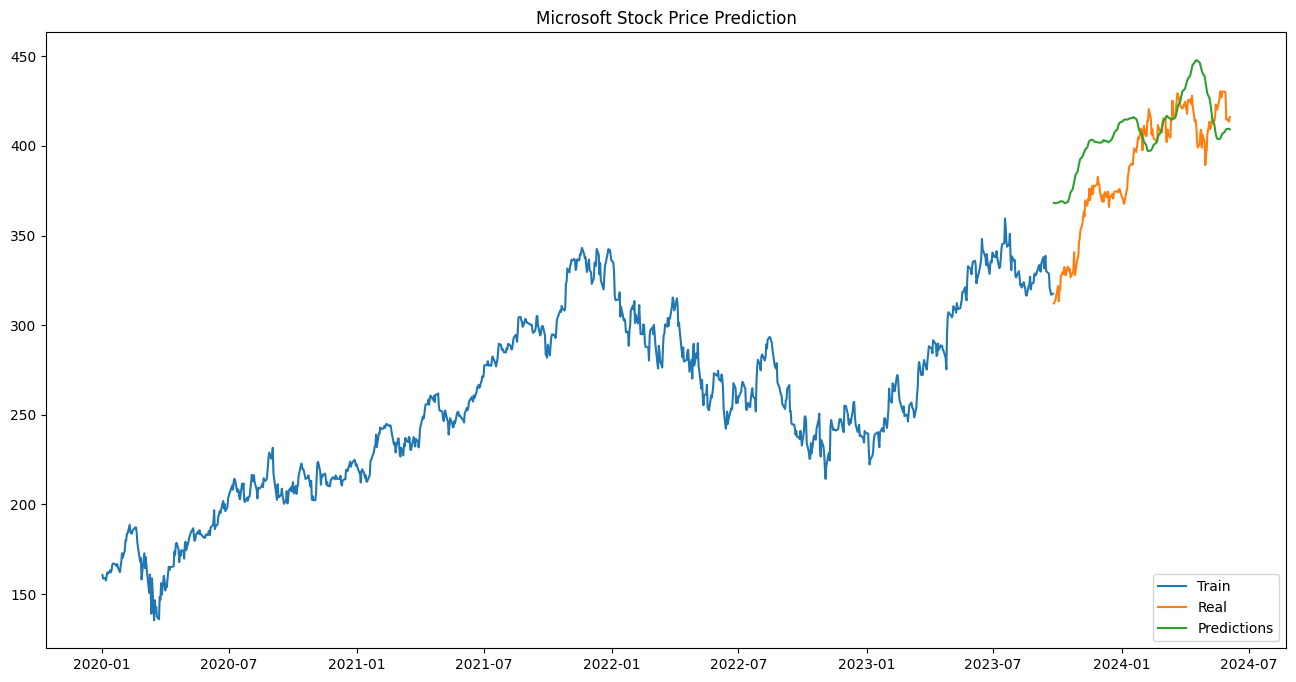

In [9]:
# 7. 결과 시각화
train = msft[:train_size]
valid = msft[train_size:]
valid = valid.iloc[:len(predictions)]  # valid 데이터를 predictions 길이에 맞게 자름
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Microsoft Stock Price Prediction')
plt.plot(train['Close'], label='Train Data')
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Real', 'Predictions'], loc='lower right')
plt.show()

LSTM 개선

In [32]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.ndimage import gaussian_filter1d
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



c:\vscode_workspace\industrial_ai\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0431 - val_loss: 0.0029
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0046 - val_loss: 0.0024
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0017 - val_loss: 7.9149e-04
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020 - val_loss: 9.3578e-04
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0016 - val_loss: 6.9238e-04
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015 - val_loss: 8.3240e-04
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0014 - val_loss: 6.5059e-04
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - 

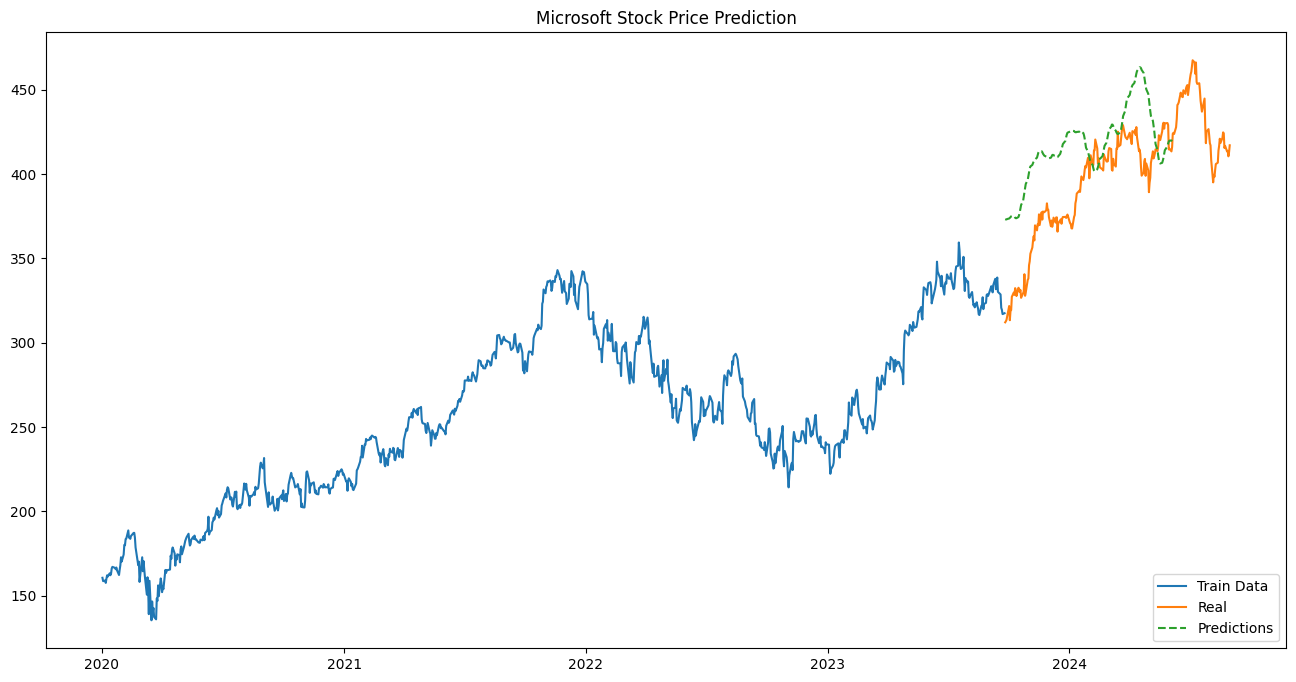

In [37]:
# 1. 주식 데이터 다운로드
msft = yf.download('MSFT', start='2020-01-01', end='2024-09-01')
data = msft['Close'].values.reshape(-1, 1)

# 2. 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 학습 데이터와 테스트 데이터 분할 (80% 학습, 20% 테스트)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# 3. 데이터셋 만들기 (LSTM은 시계열 데이터를 입력으로 받음)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# LSTM 입력 형식 맞추기 (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# 4. LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))  # Dropout 추가
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(units=25))
model.add(Dense(units=1))

# 5. 모델 컴파일 및 학습
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# 6. 예측 수행
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# 7. 결과 시각화
train = msft[:train_size]
valid = msft[train_size:].copy()  # Adjust the index to match the length of predictions
valid['Predictions'] = np.nan

# Fill the Predictions column with predicted values
valid.iloc[:len(predictions), valid.columns.get_loc('Predictions')] = predictions.flatten()

plt.figure(figsize=(16,8))
plt.title('Microsoft Stock Price Prediction')
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(valid.index, valid['Close'], label='Real')
plt.plot(valid.index, valid['Predictions'], label='Predictions', linestyle='--')
plt.legend(loc='lower right')
plt.show()

## Prophet

In [10]:
pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ------ --------------------------------- 2.1/13.3 MB 10.7 MB/s eta 0:00:02
   ------------- -------------------------- 4.5/13.3 MB 10.7 MB/s eta 0:00:01
   -------------------- ------------------- 6.8/13.3 MB 11.0 MB/s eta 0:00:01
   --------------------------- ------------ 9.2/13.3 MB 11.2 MB/s eta 0:00:01
   ------------------------------ --------- 10.2/13.3 MB 10.0 MB/s eta 0:00:01
   ------------------------------------- -- 12.6/13.3 MB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 9.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 10.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [17]:
# 1. 주식 데이터 다운로드
msft = yf.download('MSFT', start='2020-01-01', end='2024-09-01')

# 2. Prophet 모델을 위한 데이터 준비
df = msft[['Close']].reset_index()
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# 3. 학습 데이터와 테스트 데이터 분할 (8:2 비율)
train_size = int(len(df) * 0.8)
train_data = df[:train_size]  # 학습 데이터 (80%)
test_data = df[train_size:]   # 테스트 데이터 (20%)

[*********************100%***********************]  1 of 1 completed


In [18]:
# 4. Prophet 모델 초기화 및 학습
model = Prophet()
model.fit(train_data)

15:17:32 - cmdstanpy - INFO - Chain [1] start processing
15:17:32 - cmdstanpy - INFO - Chain [1] done processing


In [19]:
# 5. 테스트 데이터에 해당하는 미래 예측 수행
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

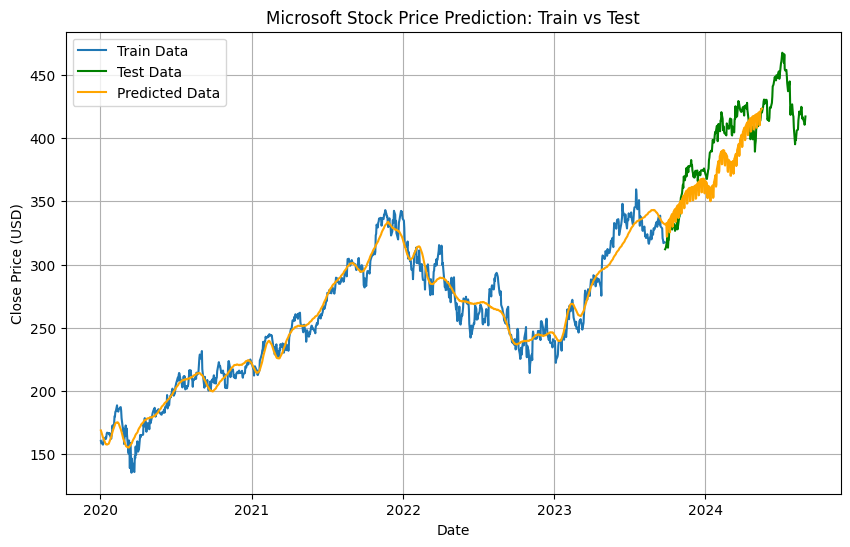

In [20]:
# 6. 예측 데이터와 실제 데이터 비교
plt.figure(figsize=(10, 6))

# 학습 데이터
plt.plot(train_data['ds'], train_data['y'], label='Train Data')

# 테스트 데이터 (실제 값)
plt.plot(test_data['ds'], test_data['y'], label='Test Data', color='green')

# 예측 데이터
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Data', color='orange')

# 그래프 세부 설정
plt.title('Microsoft Stock Price Prediction: Train vs Test')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

[*********************100%***********************]  1 of 1 completed
15:25:51 - cmdstanpy - INFO - Chain [1] start processing
15:25:51 - cmdstanpy - INFO - Chain [1] done processing


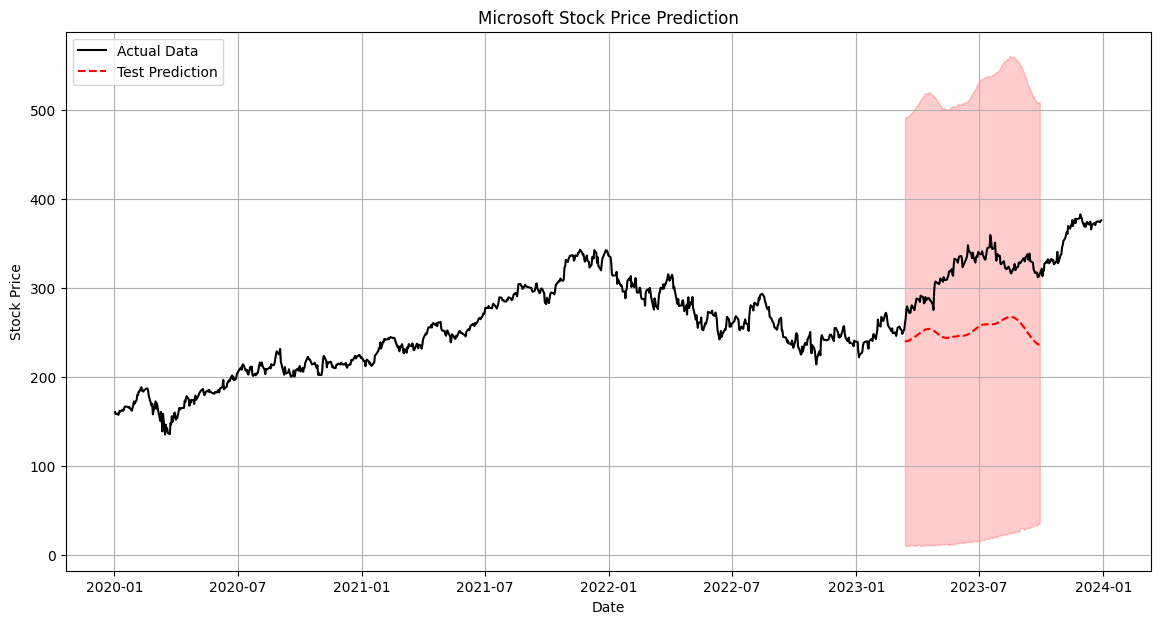

In [23]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 데이터 다운로드
ticker = 'MSFT'
start_date = '2020-01-01'
end_date = '2024-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# 데이터 전처리
df = data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']

# 데이터 분할
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Prophet 모델 생성 및 학습
model = Prophet()
model.fit(train_data)

# 미래 데이터 프레임 생성 (테스트 데이터 범위 포함)
future = model.make_future_dataframe(periods=len(test_data))

# 예측
forecast = model.predict(future)

# 학습 데이터와 테스트 데이터 예측 결과 병합
train_forecast = forecast[forecast['ds'].isin(train_data['ds'])]
test_forecast = forecast[forecast['ds'].isin(test_data['ds'])]

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['y'], label='Actual Data', color='black')
# plt.plot(train_forecast['ds'], train_forecast['yhat'], label='Train Prediction', color='blue', linestyle='--')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Test Prediction', color='red', linestyle='--')

plt.fill_between(test_forecast['ds'], test_forecast['yhat'] - test_forecast['yhat_lower'],
                 test_forecast['yhat'] + test_forecast['yhat_upper'], color='red', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()


Prophet 성능 개선

[*********************100%***********************]  1 of 1 completed
15:28:26 - cmdstanpy - INFO - Chain [1] start processing
15:28:26 - cmdstanpy - INFO - Chain [1] done processing


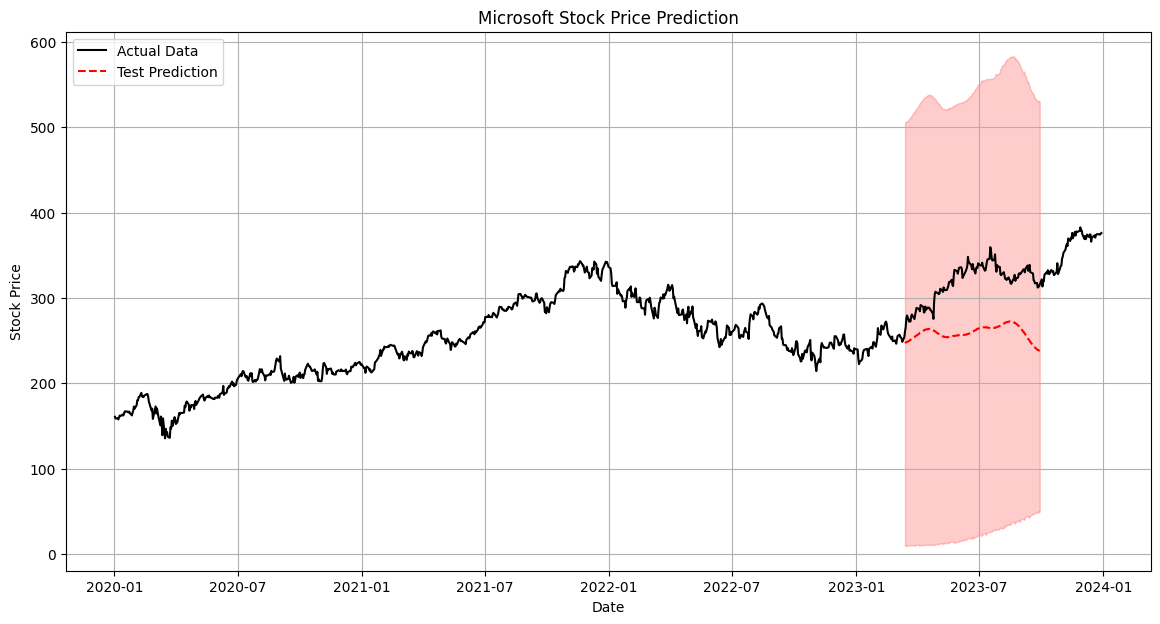

In [25]:
# 데이터 다운로드
ticker = 'MSFT'
start_date = '2020-01-01'
end_date = '2024-01-01'
data = yf.download(ticker, start=start_date, end=end_date)

# 데이터 전처리
df = data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']

# 데이터 분할
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Prophet 모델 생성 및 학습
model = Prophet(
    yearly_seasonality=True,  # 연간 계절성 추가
    weekly_seasonality=True,  # 주간 계절성 추가
    daily_seasonality=False,   # 일일 계절성 비활성화 (데이터에 따라 조정)
    changepoint_prior_scale=0.1,   # 추세 변화점에 대한 규제 조정
    seasonality_prior_scale=10.0   # 계절성에 대한 규제 조정
)

model.fit(train_data)

# 미래 데이터 프레임 생성 (테스트 데이터 범위 포함)
future = model.make_future_dataframe(periods=len(test_data))

# 예측
forecast = model.predict(future)

# 학습 데이터와 테스트 데이터 예측 결과 병합
train_forecast = forecast[forecast['ds'].isin(train_data['ds'])]
test_forecast = forecast[forecast['ds'].isin(test_data['ds'])]

# 시각화
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['y'], label='Actual Data', color='black')
# plt.plot(train_forecast['ds'], train_forecast['yhat'], label='Train Prediction', color='blue', linestyle='--')
plt.plot(test_forecast['ds'], test_forecast['yhat'], label='Test Prediction', color='red', linestyle='--')

plt.fill_between(test_forecast['ds'], test_forecast['yhat'] - test_forecast['yhat_lower'],
                 test_forecast['yhat'] + test_forecast['yhat_upper'], color='red', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()